# City Pairs: Domestic Traffic

AndrewJ, 2016-06-12

## Description

Visualisation sandbox on some random data sets using Python3. In this case, it's Australian [monthly airport domestic traffic data](https://data.gov.au/dataset/domestic-airlines-top-routes-and-totals) via data.gov.au, dated 2016-05.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
from matplotlib.pyplot import *

## Read and process the data

In [2]:
def read_traffic():
    return pd.read_csv("data/DOMCityPairsWeb.csv")

In [3]:
def transform_traffic(df):
    df1 = df.assign(
        Journey = df.City1 + "-" + df.City2, 
        Month = dt.datetime(1899, 12, 30) + df['Month'].map(dt.timedelta))
    return df1

## Run

In [4]:
dom = transform_traffic(read_traffic())

In [5]:
dom.head(5)

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,Journey
0,ALBURY,SYDNEY,1984-01-01,11478,296,79.8,452,5188056,6501323.0,14383,1984,1,ALBURY-SYDNEY
1,ALBURY,SYDNEY,1984-02-01,9590,276,68.2,452,4334680,6355836.0,14062,1984,2,ALBURY-SYDNEY
2,ALBURY,SYDNEY,1984-03-01,10462,294,70.5,452,4728824,6707552.0,14840,1984,3,ALBURY-SYDNEY
3,ALBURY,SYDNEY,1984-04-01,9366,243,77.2,452,4233432,5483720.0,12132,1984,4,ALBURY-SYDNEY
4,ALBURY,SYDNEY,1984-05-01,10110,245,76.9,452,4569720,5942419.0,13147,1984,5,ALBURY-SYDNEY


In [6]:
dom.dtypes

City1                            object
City2                            object
Month                    datetime64[ns]
Passenger_Trips                   int64
Aircraft_Trips                    int64
Passenger_Load_Factor           float64
Distance_GC_(km)                  int64
RPKs                              int64
ASKs                            float64
Seats                             int64
Year                              int64
Month_num                         int64
Journey                          object
dtype: object

## Visualise

Top 20 sectors by total passengers

In [7]:
trips = dom['Passenger_Trips'] \
    .groupby(dom['Journey']) \
    .mean() \
    .sort_values(ascending = False)
trips.head(10)

Journey
MELBOURNE-SYDNEY        434215.695090
BRISBANE-SYDNEY         264164.968992
BRISBANE-MELBOURNE      151939.793282
ADELAIDE-MELBOURNE      121794.266150
GOLD COAST-SYDNEY       121762.348837
ADELAIDE-SYDNEY          94319.596899
MELBOURNE-PERTH          90953.041344
PERTH-SYDNEY             80588.563307
MELBOURNE-GOLD COAST     70807.532468
BRISBANE-CAIRNS          69417.198966
Name: Passenger_Trips, dtype: float64

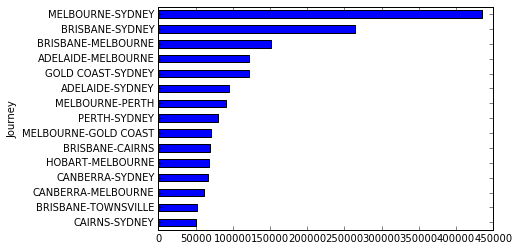

In [18]:
trips.head(15).sort_values(ascending = True).plot(kind = 'barh')

Time series of monthly passenger numbers.

In [19]:
trips_months = dom.groupby(['Month'])[['Passenger_Trips']].sum()

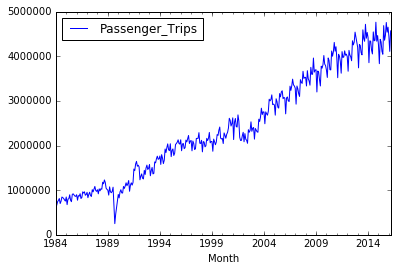

In [10]:
trips_months.plot()

Plot the moving average centered over a 12-month window.

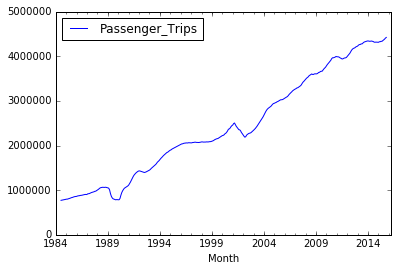

In [25]:
trips_months.rolling(window = 12, center = True) \
            .mean() \
            .plot(ylim = [0, 5000000])